In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# find the mean value
avg_age = df['Age'].mean()
df['Age'].fillna(avg_age, inplace=True)

/tmp/ipykernel_5103/1090381219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(avg_age, inplace=True)


In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
embarked_mode = df['Embarked'].mode()[0]
embarked_mode

'S'

In [18]:
df.fillna({'Embarked': embarked_mode}, inplace=True)

In [20]:
df.drop('Cabin', axis=1, inplace=True)

In [22]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

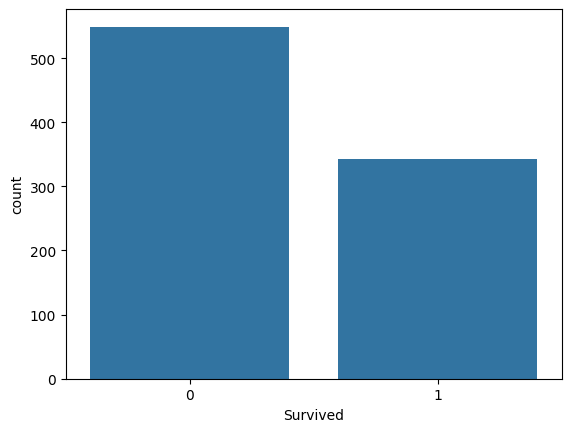

In [31]:
sns.countplot(x= df['Survived'], data=df)

<Axes: xlabel='Sex', ylabel='count'>

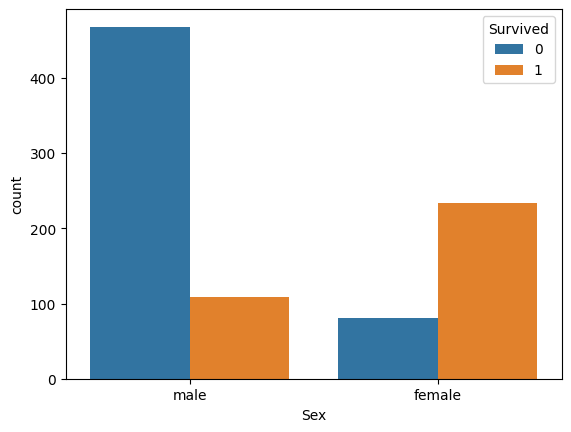

In [32]:
sns.countplot(x=df['Sex'], hue='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

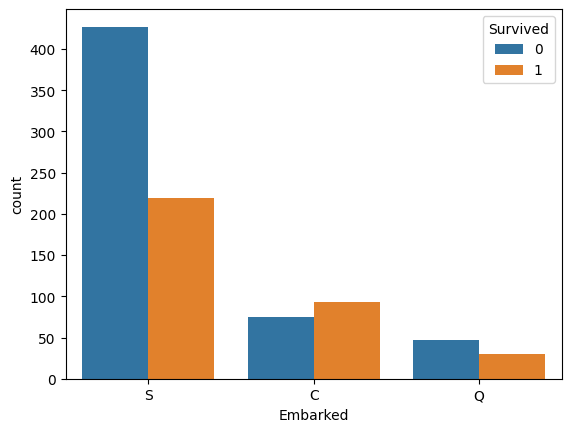

In [33]:
sns.countplot(x=df['Embarked'], hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

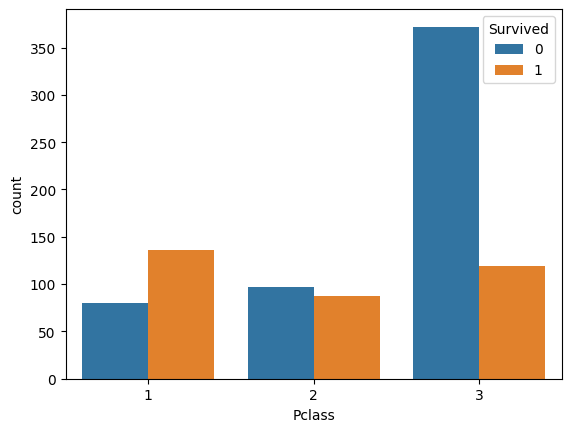

In [34]:
sns.countplot(x=df['Pclass'], hue='Survived', data=df)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [49]:
# Scalling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q': 2})
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [52]:
# Train model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [53]:
y_pred_train_dt = dt_model.predict(x_train_scaled)
y_pred_test_dt = dt_model.predict(x_test_scaled)

dt_train_acc = accuracy_score(y_train, y_pred_train_dt)
dt_test_acc = accuracy_score(y_test, y_pred_test_dt)

print(f"Decision Tree Train Acc: {dt_train_acc}")
print(f"Decision Tree Test Acc: {dt_test_acc}")

Decision Tree Train Acc: 0.9859550561797753
Decision Tree Test Acc: 0.776536312849162


In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)


RandomForestClassifier()

In [59]:
y_pred_train_rf_dt = rf_model.predict(x_train_scaled)
y_pred_test_rf_dt = rf_model.predict(x_test_scaled)

rf_dt_train_acc = accuracy_score(y_train, y_pred_train_rf_dt)
rf_dt_test_acc = accuracy_score(y_test, y_pred_test_rf_dt)

print(f"Random Forest Tran Acc: {rf_dt_train_acc}")
print(f"Random Forest Test Acc: {rf_dt_test_acc}")

Random Forest Tran Acc: 0.9859550561797753
Random Forest Test Acc: 0.7932960893854749


In [60]:
adab_model = AdaBoostClassifier()
adab_model.fit(x_train_scaled, y_train)

/home/seam/Documents/work_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [63]:
y_pred_train_adab_dt = adab_model.predict(x_train_scaled)
y_pred_test_adab_dt = adab_model.predict(x_test_scaled)

adab_dt_train_acc = accuracy_score(y_train, y_pred_train_adab_dt)
adab_dt_test_acc = accuracy_score(y_test, y_pred_test_adab_dt)

print(f"Random Forest Tran Acc: {adab_dt_train_acc}")
print(f"Random Forest Test Acc: {adab_dt_test_acc}")

Random Forest Tran Acc: 0.848314606741573
Random Forest Test Acc: 0.7541899441340782


In [64]:
cm = confusion_matrix(y_test, y_pred_test_adab_dt)
cm_df = df
print('Confusion Matrix:')
print(cm_df)

Confusion Matrix:
     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


Text(0.5, 1.0, 'Confusion matrix')

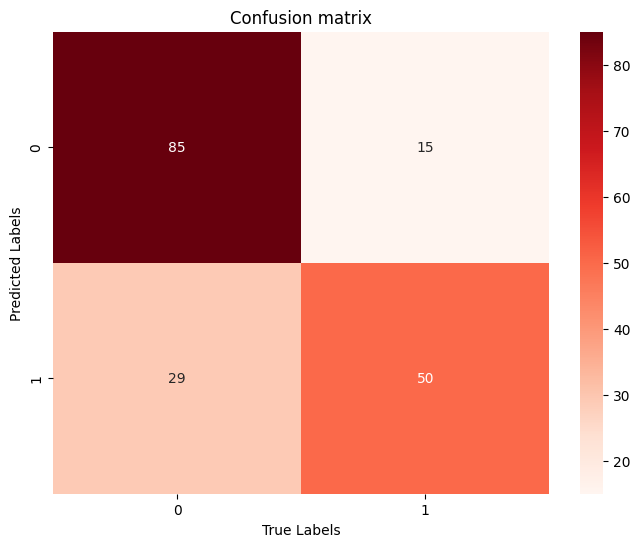

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion matrix')